## Load the necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

np.set_printoptions(suppress=True)

## Download the MNIST dataset using Keras

In [ ]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
help(tf.keras.datasets.mnist.load_data)

Help on function load_data in module tensorflow.python.keras.datasets.mnist:

load_data(path='mnist.npz')
    Loads the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    (MNIST homepage)[http://yann.lecun.com/exdb/mnist/].
    
    
    Arguments:
        path: path where to cache the dataset locally
            (relative to ~/.keras/datasets).
    
    Returns:
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    
        **x_train, x_test**: uint8 arrays of grayscale image data with shapes
          (num_samples, 28, 28).
    
        **y_train, y_test**: uint8 arrays of digit labels (integers in range 0-9)
          with shapes (num_samples,).
    
    License:
        Yann LeCun and Corinna Cortes hold the copyright of MNIST dataset,
        which is a derivative work from original NIST datasets.
    

In [ ]:
print ('x_train samples = ' + str(x_train.shape))
print ('y_train samples = ' + str(y_train.shape))

print ('x_test samples = ' + str(x_test.shape))
print ('y_test samples = ' + str(y_test.shape))

x_train samples = (60000, 28, 28)
y_train samples = (60000,)
x_test samples = (10000, 28, 28)
y_test samples = (10000,)


## Plot some example images

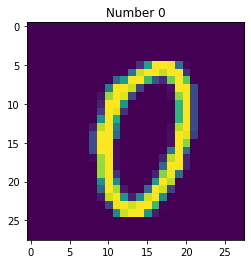

In [ ]:
i=1000
label = y_train[i]
image = x_train[i]
plt.title('Number %d' % (label))
plt.imshow(image)
plt.show()

## Preprocess the data ready for tensorflow

In [ ]:
y_input = tf.keras.utils.to_categorical(y_train)
x_input = (np.reshape(x_train, (x_train.shape[0], 784)) / 255.0).astype(np.float32)

In [ ]:
print ('x_input samples = ' + str(x_input.shape))
print ('y_input samples = ' + str(y_input.shape))

x_input samples = (60000, 784)
y_input samples = (60000, 10)


In [ ]:
x_input[0].dtype

dtype('float32')

## Create the tensorflow graph

In [ ]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

## Set-up the multinomial logistic regression

In [ ]:
# predicted probability for each class
def y_pred(x):
    return tf.nn.softmax(tf.matmul(x,W) + b)

# cross entropy loss function
def loss(x,y):
    y_ = y_pred(x)
    return tf.reduce_mean(-tf.reduce_sum(y * tf.math.log(y_), axis=[1]))

## Set-up the training routine

In [ ]:

train_steps = 2500


# learning rate
lr = 1e-1

# gradient descent optimizer
optimizer = tf.optimizers.SGD(lr)



## Create a session and run the training

In [ ]:

for i in range(train_steps):
    with tf.GradientTape() as tape:
        current_loss = loss(x_input,y_input)
    gradients = tape.gradient(current_loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W ,b]))
    if i%100 == 0:
        print('Training Step:' + str(i) + '  Loss = ' + str(current_loss))

Training Step:0  Loss = tf.Tensor(2.3025854, shape=(), dtype=float32)
Training Step:100  Loss = tf.Tensor(0.6087094, shape=(), dtype=float32)
Training Step:200  Loss = tf.Tensor(0.48937273, shape=(), dtype=float32)
Training Step:300  Loss = tf.Tensor(0.44037214, shape=(), dtype=float32)
Training Step:400  Loss = tf.Tensor(0.412158, shape=(), dtype=float32)
Training Step:500  Loss = tf.Tensor(0.3932503, shape=(), dtype=float32)
Training Step:600  Loss = tf.Tensor(0.37943116, shape=(), dtype=float32)
Training Step:700  Loss = tf.Tensor(0.3687482, shape=(), dtype=float32)
Training Step:800  Loss = tf.Tensor(0.36015943, shape=(), dtype=float32)
Training Step:900  Loss = tf.Tensor(0.35305175, shape=(), dtype=float32)
Training Step:1000  Loss = tf.Tensor(0.34703794, shape=(), dtype=float32)
Training Step:1100  Loss = tf.Tensor(0.3418597, shape=(), dtype=float32)
Training Step:1200  Loss = tf.Tensor(0.33733717, shape=(), dtype=float32)
Training Step:1300  Loss = tf.Tensor(0.33334082, shape=()

## Check the accuracy on the training data

In [ ]:
y_prob = y_pred(x_input).numpy()

print(y_prob.shape)
y_prediction = np.argmax(y_prob,axis=-1)
print('train accuracy: ', np.sum(y_prediction==y_train)/len(y_train))

(60000, 10)
train accuracy:  0.91545


## Check the accuracy on the test data

In [ ]:
x_test_input = (np.reshape(x_test, (x_test.shape[0], 784)) / 255.0).astype(np.float32)

y_prob = y_pred(x_test_input).numpy()

print(y_prob.shape)
y_prediction = np.argmax(y_prob,axis=-1)
print('test accuracy: ', np.sum(y_prediction==y_test)/len(y_test))

(10000, 10)
test accuracy:  0.9184


## Look at predictions for different samples

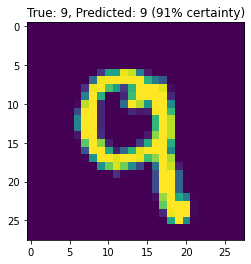

In [ ]:
i=1645

label = y_test[i]
image = x_test[i]
plt.title('True: %d, Predicted: %d (%d%% certainty)' % (label,y_prob[i].argmax(),100*y_prob[i,y_prob[i].argmax()]))
plt.imshow(image)
plt.show()

## Plot out the learnt weights for each pixel

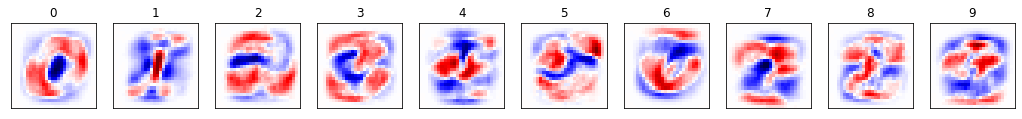

In [ ]:
plt.figure(figsize=(18,5))
for i in range(10):
    plt.subplot(1, 10, i+1)
    weight = W.numpy()[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]),vmin=-0.5,vmax=0.5, cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)
plt.show()